<div align="center">
    <img src='../xepimage.png' style='height:100px;'>
</div>


<center><h1 style='font-size:25px'>EDA</h1></center>

---

**Autor: Guillermo J. Bergues**

Exploratory data analysis for the Xepelin project.

* PayerId = Id de la empresa que va a realizar el pago
* ReceiverId
* invoiceId
* paidAt
* amount = Monto de la factura pagada
* amountfinancedByXepelin =  Monto de la factura que Xepelin financió al pagador para realizar la transacción
* Status =  Estado de cada transacción Pagada, Procesando, Fallida.

In [1]:
pip install missingno

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

%matplotlib inline

In [3]:
# Boxplot Marker
mark1 = dict(marker='+', markerfacecolor='g', markersize=15,
                  linestyle='none', markeredgecolor='r')

mark2 = dict(marker='+', markerfacecolor='g', markersize=15,
                  linestyle='none', markeredgecolor='b')

In [4]:
# Read data set
df = pd.read_csv ('../Data/data_set.csv')

# General information

In [5]:
# Data overview
df.head()

,PayerId,ReceiverId,invoiceId,paidAt,amount,amountfinancedByXepelin,status
0,53,10,18660729,2022-04-23 00:00:00,1490.46,0.00,PAID
1,93,11,18660730,2021-11-20 00:00:00,6418.28,624.48,PAID
2,122,12,18660731,2021-10-19 00:00:00,27979.20,10520.15,PAID
3,85,13,18660732,2021-11-13 00:00:00,183070.77,79421.63,PAID
4,87,14,18660733,2022-03-23 00:00:00,20532.00,20532.00,PAID


In [6]:
# Rename column for better reading
df.rename(columns={'amountfinancedByXepelin': 'financed'}, inplace=True)

In [7]:
# Data information per column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PayerId     1200 non-null   int64  
 1   ReceiverId  1200 non-null   int64  
 2   invoiceId   1200 non-null   int64  
 3   paidAt      892 non-null    object 
 4   amount      1200 non-null   float64
 5   financed    1200 non-null   float64
 6   status      1200 non-null   object 
dtypes: float64(2), int64(3), object(2)
memory usage: 65.8+ KB


**Data set size: 1200 columns**

In [8]:
# Describe data
df.describe()

,PayerId,ReceiverId,invoiceId,amount,financed
count,1200.000000,1200.000000,1.200000e+03,1.200000e+03,1.200000e+03
mean,101.567500,60.290000,1.866133e+07,2.785217e+04,1.749303e+04
std,57.232888,40.187333,3.465545e+02,1.414899e+05,1.229016e+05
min,1.000000,10.000000,1.866073e+07,5.816000e+01,0.000000e+00
25%,52.000000,16.000000,1.866103e+07,1.251810e+03,0.000000e+00
50%,103.000000,58.000000,1.866133e+07,1.490460e+03,0.000000e+00
75%,151.250000,89.500000,1.866163e+07,4.120858e+03,0.000000e+00
max,200.000000,154.000000,1.866193e+07,3.370742e+06,3.370742e+06


# Data discovery and understanding

In [9]:
# Which is the PayerId with the highest -amountfinancedByXepelin-?
# This information is for a further discovery.
# We need to know why we financed sush amount.
df[df['financed']==df['financed'].max()]['PayerId']

487    106
Name: PayerId, dtype: int64

In [10]:
# Which is the ReceiverId with the highest -amountfinancedByXepelin-?
df[df['financed']==df['financed'].max()]['ReceiverId']

487    126
Name: ReceiverId, dtype: int64

# Amounts distributions

### Amount

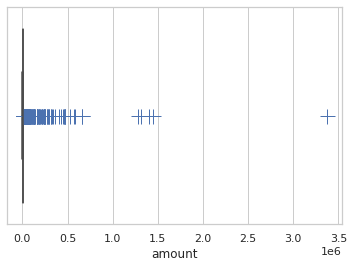

In [11]:
# Box plot amount
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["amount"], flierprops=mark2)

There are some outliers. But I can't say if the data is correct or not. Maybe there are some transactions that are very high (or maybe is an outlier).

In [12]:
# Max amount transaction. 
df['amount'].max()

3370741.92

<AxesSubplot:xlabel='amount', ylabel='Count'>

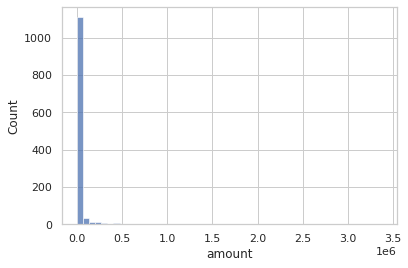

In [13]:
# Amount distribution
sns.histplot(data=df, x=df["amount"], bins=50)

The amounts do not have a normal distribution.

### Amount financed By Xepelin

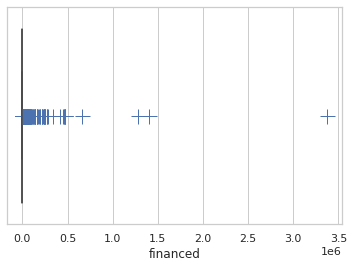

In [14]:
# Financed by Xepelin
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["financed"], flierprops=mark2)

In [15]:
# Max financed Amount 
df['financed'].max()

3370741.92

The max amount is completly financed by Xepelin (it sound like a mistake).

<AxesSubplot:xlabel='financed', ylabel='Count'>

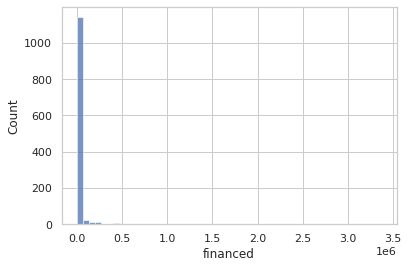

In [16]:
# Financed amount distribution.
sns.histplot(data=df, x=df["financed"], bins=50)

The financed amounts do not have a normal distribution.

## Null Values

In [17]:
# Null values per column
df.isnull().sum()

PayerId         0
ReceiverId      0
invoiceId       0
paidAt        308
amount          0
financed        0
status          0
dtype: int64

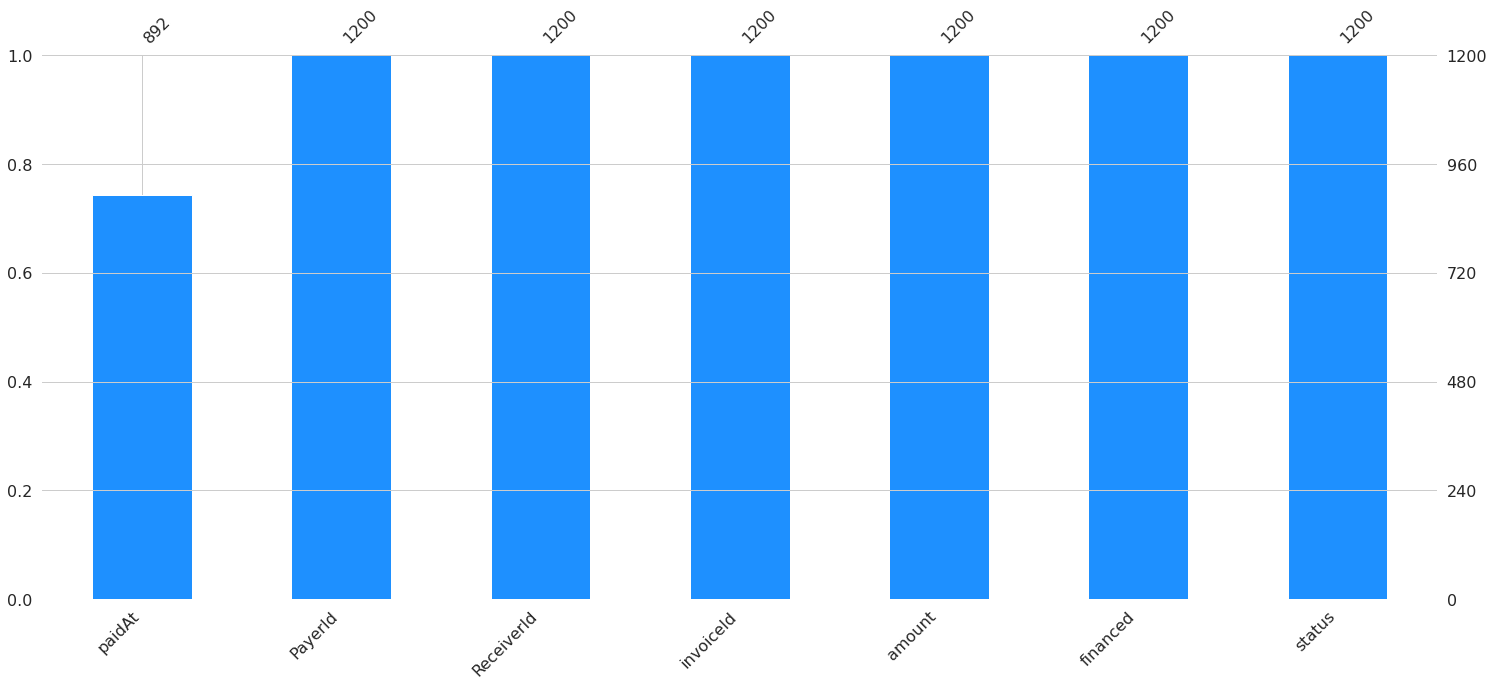

In [18]:
# If the column is small it has more null values
# If the column is hight (near 1200 values) the informations is complete
msno.bar(df, color="dodgerblue", sort="ascending")
plt.show()

In [19]:
# Null values in detail per status
df['status'].value_counts()

PAID          892
PROCESSING    269
FAILED         39
Name: status, dtype: int64

null values = PROCESSING + FAILED = 308

# Duplicated values

In [20]:
# Do we have duplicated invoiceId'?
df[df['invoiceId'].duplicated() == True]

,PayerId,ReceiverId,invoiceId,paidAt,amount,financed,status


In [21]:
# Unique values
df.nunique()

PayerId        200
ReceiverId      77
invoiceId     1200
paidAt         132
amount         478
financed       269
status           3
dtype: int64

We don't have duplicated values (analizing invoiceID).

# FAILED, PAID and PROCESSING

## Financiados

In [22]:
# Rearrenge table for financed amounts.
df_financed = df.pivot(index='invoiceId', 
                       columns='status', 
                       values='financed').reset_index()

In [23]:
df_financed.head()

status,invoiceId,FAILED,PAID,PROCESSING
0,18660729,NaN,0.00,NaN
1,18660730,NaN,624.48,NaN
2,18660731,NaN,10520.15,NaN
3,18660732,NaN,79421.63,NaN
4,18660733,NaN,20532.00,NaN


In [24]:
df_financed.describe()

status,invoiceId,FAILED,PAID,PROCESSING
count,1.200000e+03,3.900000e+01,8.920000e+02,269.000000
mean,1.866133e+07,6.244917e+04,1.854811e+04,7476.591078
std,3.465545e+02,2.390382e+05,1.318592e+05,35663.729829
min,1.866073e+07,0.000000e+00,0.000000e+00,0.000000
25%,1.866103e+07,0.000000e+00,0.000000e+00,0.000000
50%,1.866133e+07,0.000000e+00,0.000000e+00,0.000000
75%,1.866163e+07,4.467075e+03,0.000000e+00,0.000000
max,1.866193e+07,1.404453e+06,3.370742e+06,451130.190000


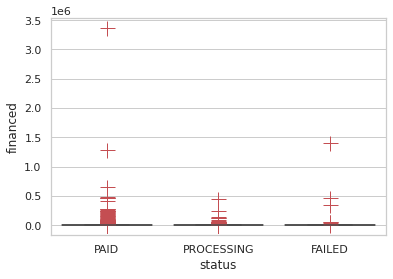

In [25]:
# Distribution per status
ax = sns.boxplot(x="status", y="financed", data=df, flierprops=mark1)

* Most values are at one extreme (lower amounts).
* We have an outlier on PAID

### Adding values

In [26]:
# Montos financiados fallidos
df_financed['FAILED'].sum()

2435517.73

In [27]:
# Montos financiados en proceso
df_financed['PROCESSING'].sum()

2011203.0

In [28]:
# Montos financiados pagados
df_financed['PAID'].sum()

16544913.41

## Mount

In [29]:
df_amount = df.pivot(index='invoiceId', 
                     columns='status', 
                     values='amount').reset_index()

In [30]:
df_amount.head()

status,invoiceId,FAILED,PAID,PROCESSING
0,18660729,NaN,1490.46,NaN
1,18660730,NaN,6418.28,NaN
2,18660731,NaN,27979.20,NaN
3,18660732,NaN,183070.77,NaN
4,18660733,NaN,20532.00,NaN


In [31]:
df_amount.describe()

status,invoiceId,FAILED,PAID,PROCESSING
count,1.200000e+03,3.900000e+01,8.920000e+02,269.000000
mean,1.866133e+07,6.694802e+04,3.075226e+04,12567.335985
std,3.465545e+02,2.382753e+05,1.541727e+05,44781.266478
min,1.866073e+07,4.478600e+02,5.816000e+01,201.200000
25%,1.866103e+07,1.469060e+03,1.313610e+03,1107.260000
50%,1.866133e+07,1.490460e+03,1.490460e+03,1592.460000
75%,1.866163e+07,1.414270e+04,5.541030e+03,3000.000000
max,1.866193e+07,1.404453e+06,3.370742e+06,451130.190000


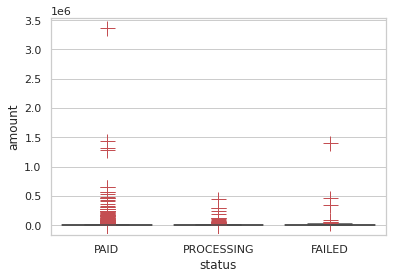

In [32]:
# Distribution per status
ax = sns.boxplot(x="status", y="amount", data=df, flierprops=mark1)

* Most values are at one extreme (lower amounts).
* We have an outlier on PAID.

In [33]:
# Montos fallidos
df_amount['FAILED'].sum()

2610972.74

In [34]:
# Montos en proceso
df_amount['PROCESSING'].sum()

3380613.38

In [35]:
# Montos pagados
df_amount['PAID'].sum()

27431012.91

# Correlation between features

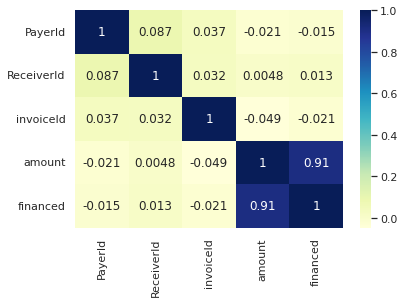

In [36]:
# In the following plot we can see the corralation between all columns
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu");

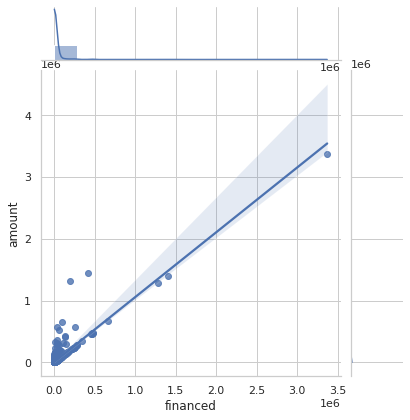

In [37]:
# Relation between GDP and Healthy life expectancy
sns.jointplot(x='financed', y='amount', kind='reg', data=df);

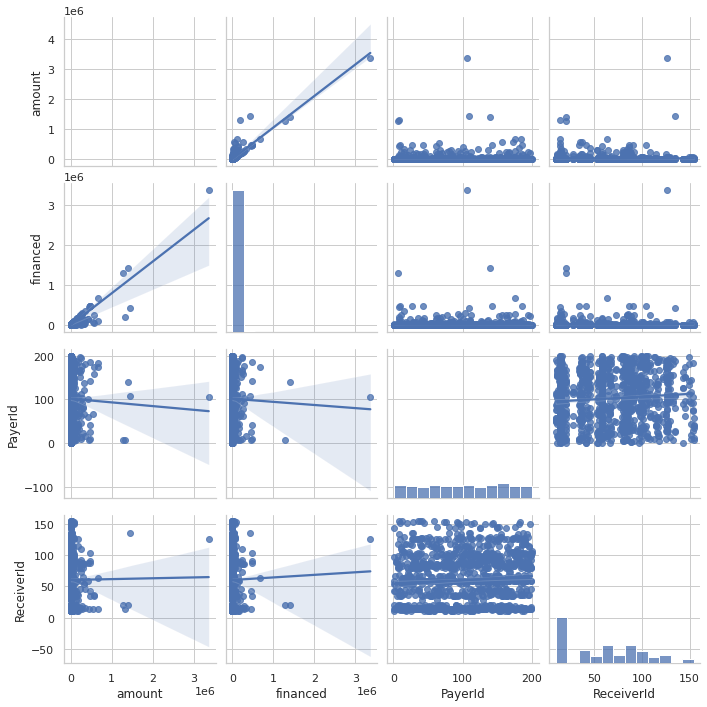

In [38]:
# A fast view around correlation of some special data.
df_sub = df[['amount', 'financed', 'PayerId', 'ReceiverId']]
sns.pairplot(df_sub, kind='reg')

* The maximum correlation is between the amounts. This is surely due to a relationship established by business.
* We don't have good correlations with features.

# Outliers PayerId, ReceiverId.

Search for strange values.

/opt/miniconda3/envs/myenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/miniconda3/envs/myenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


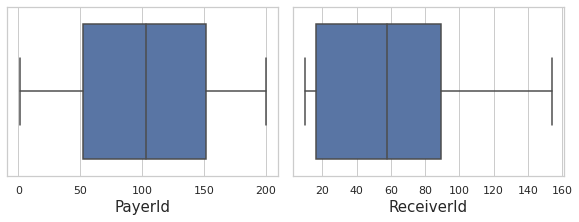

In [39]:
col_list = ['PayerId', 'ReceiverId']

plt.figure(figsize = (20, 15))
plotnumber = 1

for col in col_list:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(df[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()

There is not strange values in payer and receiver. 